In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\RutujaKshirsagar\Downloads\Dataset.csv\Dataset.csv")
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles=pd.read_csv(r"C:\Users\RutujaKshirsagar\Downloads\Movie_Id_Titles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


 Both the data clearly have relation as they have 'item_Id' column in both the datasets. It was important to have such relation so that we would be able to merge both the datasets. So now lets merge both the datasets by means of 'item_Id' column.

In [5]:
Movie_imdb_data=pd.merge(data,movie_titles,on='item_id')
Movie_imdb_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
Movie_imdb_data.groupby(by='title')['rating'].mean().sort_values(ascending=False)
# This would produce means of all the ratings related to a specific title.

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [8]:
Movie_imdb_data.groupby(by='title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

Lets first create a dataframe and then would probably build a joint plot to know the relationships between the Mean Ratings and the number of people rated it.

In [10]:
Movie_imdb_data.groupby(by='title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [13]:
New_data=pd.DataFrame(Movie_imdb_data.groupby(by='title')['rating'].mean())
New_data.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [16]:
# Lets also add number of ratings into the dataframe along with its mean ratings.

New_data['No. of people Rated']=Movie_imdb_data.groupby(by='title')['rating'].count()

New_data.head()

,rating,No. of people Rated
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [17]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rating               1664 non-null   float64
 1   No. of people Rated  1664 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 39.0+ KB


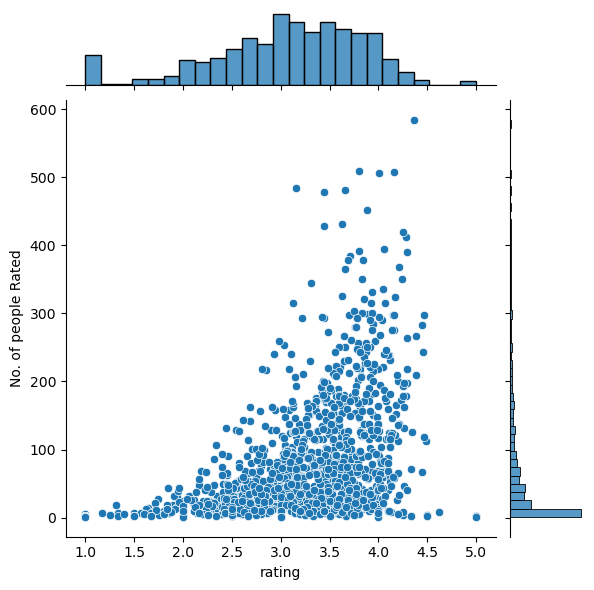

In [19]:
sns.jointplot(x=New_data['rating'],y=New_data['No. of people Rated']);

This clearly shows that the Movies with ratings in the range of 3 to 4.5 has the most number of ratings. Movies with almost 5 star ratings has around 10 or 20 number of ratings to it. Lets just plot a Densityplot to have a look at the dense regions.

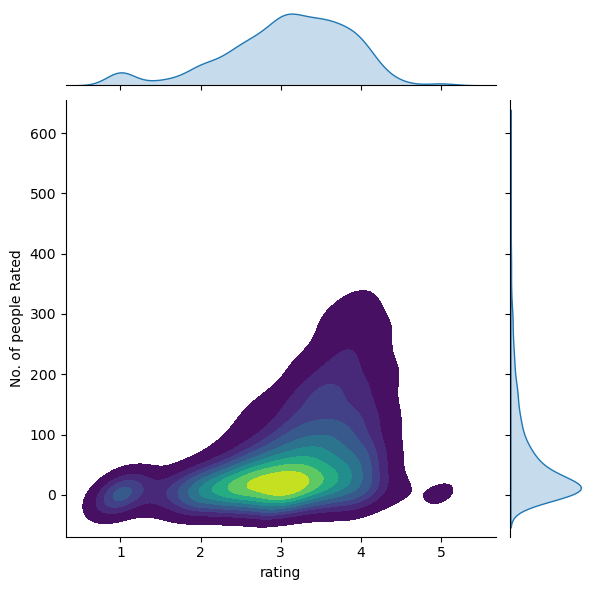

In [23]:
sns.jointplot(x=New_data['rating'],y=New_data['No. of people Rated'],kind='kde',fill=True, cmap='viridis');

We can see the brightest zone in the plot which represent most no. of datapoints almost have 3 to 4 star ratings. Bright regions generally represent the Dense zones, which simply means alot of datapoints at that region.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


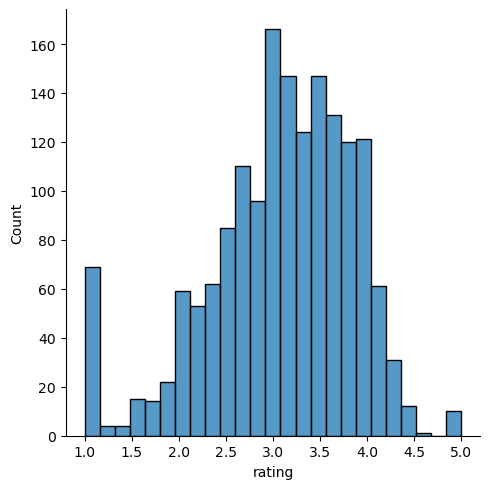

In [26]:
# Now let see the individual distributions of the features.

sns.displot(New_data['rating']);

It nearly have a Normal distribution with some negative skew.

Building a Simple Recommender System

In [27]:
Movie_imdb_data.head(n=5)

# This was the actual dataset that we made initially.

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


We will use this dataset to Create a PIVOT TABLE which flips the dataset's rows and columns accordingly. Lets just do that for now.

In [29]:
user_all_ratings=Movie_imdb_data.pivot_table(index='user_id',columns='title',values='rating')

# This inbuilt function from pandas will easily helps us to create a PIVOT TABLE within no time.

In [30]:
user_all_ratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Now we have ratings given by an Individual to all the movies. But there are alot of null values which kind of makes sense as a single user cannot look at all the movies out there.

In [31]:
# Column of that specified movie and would correlate it with the other movie columns.

Toy_story_similar_movies=user_all_ratings['Toy Story (1995)']
X=user_all_ratings.corrwith(Toy_story_similar_movies)
X.head()

c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.534522
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.232118
12 Angry Men (1957)          0.334943
187 (1997)                   0.651857
dtype: float64

we have just correlated our likely movie(Toy Story) with all other movies inorder to get the values that represent how similar that specific movie got ratings from a user who likes Toy story.

In [32]:
Similar_movies=pd.DataFrame(X,columns=['Correlation'])

In [33]:
Similar_movies.sort_values('Correlation',ascending=False).head(n=5)

,Correlation
title,
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
Reckless (1995),1.0
Ladybird Ladybird (1994),1.0
Infinity (1996),1.0
Albino Alligator (1996),1.0


These are the MOVIE RECOMMENDATIONS because I liked Toy Story.

Building a direct pipeline

Let's now create a function which takes in the name of the movie and returns name of the movies that one could like.

In [34]:
def Sim_mov_recomm():
    name=input('Please enter the name of the movie you like:')
    y=user_all_ratings[name]
    z=user_all_ratings.corrwith(y)
    df=pd.DataFrame(z,columns=['Correlation'])
    b=df.sort_values(by='Correlation',ascending=False).head(n=5)
    c=list(b.index)
    print('Movies you would also like:')
    for i in c:
        print(i)
    
    

In [36]:
Sim_mov_recomm()

c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Movies you would also like:
Diabolique (1996)
My Family (1995)
Bringing Up Baby (1938)
Everyone Says I Love You (1996)
Bride of Frankenstein (1935)
